

# Project: TMDb_Movies Data Analysis
>The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we'll be analyzing TMDb_Movies Data which contains information about 10,000 movies collected from
The Movie Database (TMDb).


 Q1:what kind of correlation between revenue and budget?

Q2:what is number of movies over the years?

Q3:What are the top 20 most expensive movies?

Q4:Do certain months of release associate with better revenues?

Q5:What is the top 10 rated movies?

Q6:Which Movie Has The Highest Or Lowest Profit?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [11]:
# load the data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#print Last two rows of the dataset
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [13]:
# display data shape
df.shape

(10866, 21)

In [14]:
#look for missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [15]:
#Display statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> After make obsevation about the data :

> 1-We need to remove duplicate rows from the dataset

> 2-Changing format of release date into datetime format

> 3-Remove the unused colums that are not needes in the analysis process.

> 4-Select only useful columns for analysis.

> 5-Remove the movies which are having zero value of budget and revenue.


### Data Cleaning

#### 1-Remove duplicate rows from the dataset

In [16]:
#find the counting of duplicate elements we sum all the rows
sum(df.duplicated())


1

####  2-Remove duplicate rows from the dataset

In [17]:
#drop these row using 'drop_duplicates()' function
df.drop_duplicates(inplace = True)

In [18]:
#After calculating the duplicate row we can drop these row using 'drop_duplicates()' function
df.drop_duplicates(inplace = True)

#### 3-Changing format of release date into datetime format

In [19]:
#the release date given in the dataset is in string format.
#So we need to change this in datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### 4-Select only useful columns for analysis.

In [20]:
#We can select only coluumns which we will use in our analysis 
columns_reqd=['id','popularity','budget','revenue','original_title','director','runtime','genres','production_companies','vote_count','vote_average','release_date','release_year']
df=df[columns_reqd]
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015-06-09,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015-05-13,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015-03-18,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015-12-15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015-04-01,2015


#### 5-Remove the movies which are having zero value of budget and revenue.

In [21]:
# explore the Budget and Revenue columns - find rows with zeros for budget and revenue
len(df[(df['budget']==0) | (df['revenue']==0)])

7011

In [22]:
# create another data frame has no zero values in budget and revenue columns 
df=df[(df['budget']>0) & (df['revenue']>0)]
df.shape

(3854, 13)

<a id='eda'></a>
## Exploratory Data Analysis



### Q1:what kind of correlation between revenue and budget?

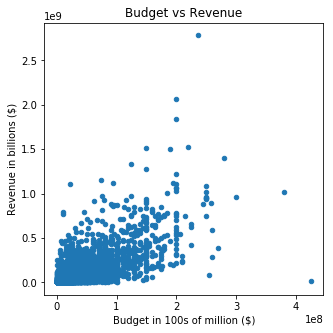

In [24]:
df.plot(x='budget',y='revenue',kind='scatter',figsize=(5,5));
plt.title('Budget vs Revenue')
plt.xlabel('Budget in 100s of million ($)');
plt.ylabel('Revenue in billions ($)');


There is a positive relationship between budget and revenue. However , not a perfectly positive correlation. It can be seen from the plot that there are some movies with high budgets but low revenues and some with low budgets and high revenues. The outliers are more with high budget movies which get low/ moderate revenues.

### Q2:what is number of movies over the years?

2011    540
2012    588
2013    659
2014    700
2015    629
Name: release_year, dtype: int64


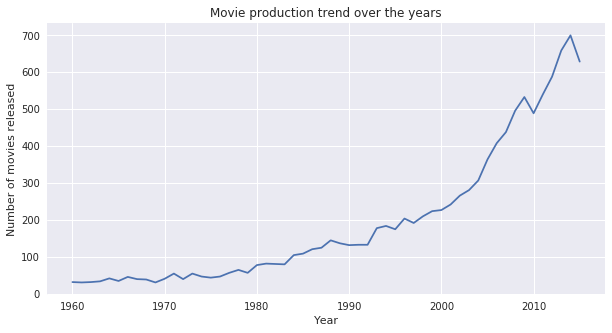

In [107]:
# Number of movies produced each year
movies_per_year= df['release_year'].value_counts().sort_index();
print(movies_per_year.tail())
plt.plot(movies_per_year);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');

### Q3:What are the top 20 most expensive movies?

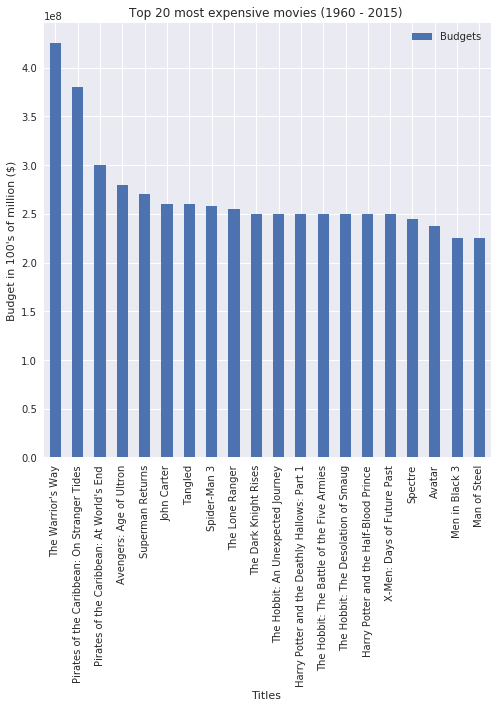

In [108]:
sorted_budget = df['budget'].sort_values(ascending=False)[:20]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 most expensive movies (1960 - 2015) ');
plt.ylabel('Budget in 100\'s of million ($)');

### Q4:Do certain months of release associate with better revenues?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


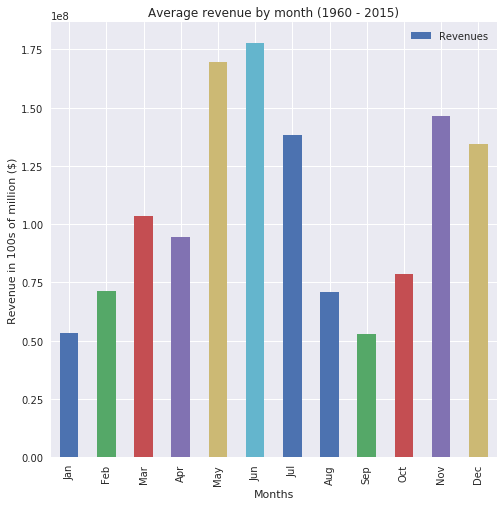

In [109]:
# Extract the month of release for every movie in a new column

df2['release_month']=df2['release_date'].dt.month

revenue_by_month = df2.groupby('release_month')['revenue'].mean()
df3=pd.DataFrame()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df3['Months']=months
df3['Revenues'] = list(revenue_by_month.get_values())
df3.plot(x='Months',y='Revenues',kind='bar',figsize=(8,8));
plt.title('Average revenue by month (1960 - 2015)');
plt.ylabel('Revenue in 100s of million ($)');

### Q5:What is the top 10 rated movies?

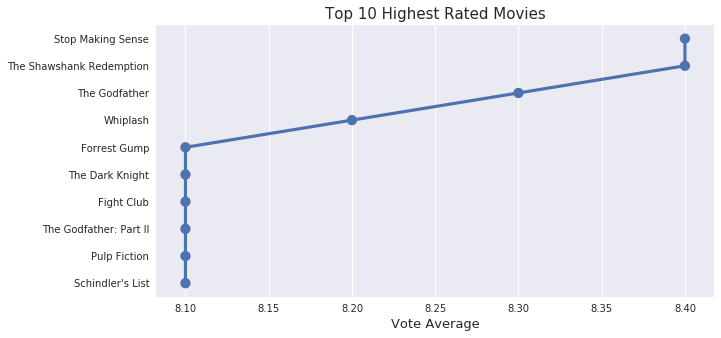

In [37]:
#top 10 highets rated movies.
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['vote_average'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

### Q6:Which Movie Has The Highest Or Lowest Profit?

In [38]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
df['Profit'] =df['revenue'] - df['budget']

In [39]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = df[x][high_index]
    low = df[x][min_index]
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " equal to " + str(high)  + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + " equal to " + str(low)   + " : ",df['original_title'][min_index ])
#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit equal to 2544505847 :  Avatar
Movie Which Has Lowest Profit equal to -413912431 :  The Warrior's Way


### Q7:Which Movie has The Highest Or Lowest Budget?

In [40]:
find_minmax('budget')

Movie Which Has Highest budget equal to 425000000 :  The Warrior's Way
Movie Which Has Lowest budget equal to 1 :  Lost & Found


### Q8:Which Movie has The Highest Or Lowest Popularity?

In [41]:
find_minmax('popularity')

Movie Which Has Highest popularity equal to 32.985763 :  Jurassic World
Movie Which Has Lowest popularity equal to 0.001117 :  Born into Brothels


<a id='conclusions'></a>
## Conclusions
> Revenue is directly connected to the budget.

> Maximum Number Of Movies Release In year 2014.

> The Warrior's way is the expensive movie.

> Jun is assosiated with better revenue.

> The story of film: An Odyssey is the tob rated movie.

### Limitations
> It's not 100 percent guaranteed solution that this formula is gonna work, But it shows us that we have high probability of making high profits if we had similar characteristics as such. If we release a movie with these characteristics, it gives people high expectations from this movie. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.

> Data set has '|' in some columns which will take more time to split these columns. 

In [111]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0